In [217]:
from sympy import *

In [218]:
x, z, a_0, a_1, a_2, a_3 = symbols('x z a_0 a_1 a_2 a_3')
ubar = Function('ubar')(x)
h = Function('h')(x)
chi_2 = Function('chi_2')(x)
u = a_0  +a_1*z + a_2*z*z + a_3*z*z*z

pprint(u)

                2       3
a₀ + a₁⋅z + a₂⋅z  + a₃⋅z 


In [219]:
eq0 = u.diff(z).subs(z,0)
pprint(eq0)
u = u.subs(a_1,0)



a₁


In [220]:
eq1 = u.diff(z).subs(z,h)
pprint(eq1)
pprint(solve(eq1,a_2)[0])
u = u.subs(a_2,solve(eq1,a_2)[0])



                  2   
2⋅a₂⋅h(x) + 3⋅a₃⋅h (x)
-3⋅a₃⋅h(x) 
───────────
     2     


In [221]:
eq2 = integrate(u,(z,0,h))
pprint(eq2)
pprint(solve(eq2 - ubar*h,a_0)[0])
u = u.subs(a_0,solve(eq2-ubar*h,a_0)[0])

              4   
          a₃⋅h (x)
a₀⋅h(x) - ────────
             4    
    3          
a₃⋅h (x)       
──────── + u̅(x)
   4           


In [222]:
eq3 = integrate(u*u,(z,0,h))
pprint(eq3)
pprint(solve(eq3-ubar**2*h*chi_2,a_3)[0])
u = u.subs(a_3,solve(eq3-ubar**2*h*chi_2,a_3)[0])

     2  7      ⎛  2  3             ⎞         ⎛    2  4                  ⎞     
13⋅a₃ ⋅h (x)   ⎜a₃ ⋅h (x)   a₃⋅u̅(x)⎟  4      ⎜  a₃ ⋅h (x)               ⎟  3 
──────────── + ⎜───────── + ───────⎟⋅h (x) + ⎜- ───────── - a₃⋅h(x)⋅u̅(x)⎟⋅h (
    140        ⎝    8          2   ⎠         ⎝      4                   ⎠     

    ⎛  2  6          3                ⎞     
     ⎜a₃ ⋅h (x)   a₃⋅h (x)⋅u̅(x)    2   ⎟     
x) + ⎜───────── + ───────────── + u̅ (x)⎟⋅h(x)
    ⎝    16            2              ⎠     
     _________________      
-4⋅╲╱ 595⋅χ₂(x) - 595 ⋅u̅(x) 
────────────────────────────
              3             
          17⋅h (x)          


In [223]:
u = simplify(u)
pprint(simplify(u))

 ⎛   3   _________________      2   _________________        ⎛  ______________
-⎝4⋅z ⋅╲╱ 595⋅χ₂(x) - 595  - 6⋅z ⋅╲╱ 595⋅χ₂(x) - 595 ⋅h(x) + ⎝╲╱ 595⋅χ₂(x) - 5
──────────────────────────────────────────────────────────────────────────────
                                                  3                           
                                              17⋅h (x)                        

___     ⎞  3   ⎞      
95  - 17⎠⋅h (x)⎠⋅u̅(x) 
──────────────────────
                      
                      


In [224]:
print(latex(u))

\frac{\left(- 4 z^{3} \sqrt{595 \chi_{2}{\left(x \right)} - 595} + 6 z^{2} \sqrt{595 \chi_{2}{\left(x \right)} - 595} h{\left(x \right)} + \left(17 - \sqrt{595 \chi_{2}{\left(x \right)} - 595}\right) h^{3}{\left(x \right)}\right) \bar{u}{\left(x \right)}}{17 h^{3}{\left(x \right)}}


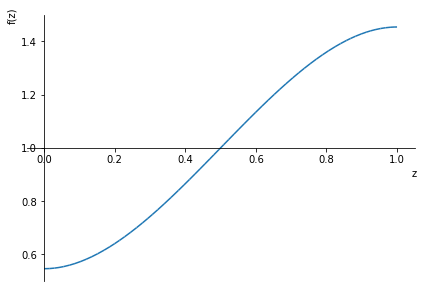

In [225]:
#plotting:
u_plot = u.subs(ubar,1).subs(h,1)

plot(u_plot.subs(chi_2,1.1),(z,0,1))

In [226]:
dudx = simplify(u.diff(x))
pprint(dudx)

     ⎛    _________________ ⎛   3   _________________      2   _______________
     ⎜  ╲╱ 595⋅χ₂(x) - 595 ⋅⎝4⋅z ⋅╲╱ 595⋅χ₂(x) - 595  - 6⋅z ⋅╲╱ 595⋅χ₂(x) - 59
     ⎜                                                                        
√595⋅⎜- ──────────────────────────────────────────────────────────────────────
     ⎝                                                               10115    
──────────────────────────────────────────────────────────────────────────────
                                                                              
                                                                              

__        ⎛  _________________     ⎞  3   ⎞      d              ______________
5 ⋅h(x) + ⎝╲╱ 595⋅χ₂(x) - 595  - 17⎠⋅h (x)⎠⋅h(x)⋅──(u̅(x))   3⋅╲╱ 595⋅χ₂(x) - 
                                                 dx                           
───────────────────────────────────────────────────────── + ──────────────────
                                                   